In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #multiplecategory
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error


In [2]:
df = pd.read_csv(r"C:\Users\HP\Pictures\Jupyter\ML Project\archive\cancer patient data sets.csv", sep=",",encoding="UTF-8")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.shape


(1000, 26)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
for column in df.columns:
    print(df[column].describe())
    print("\n----------------------------\n")

count    1000.000000
mean      499.500000
std       288.819436
min         0.000000
25%       249.750000
50%       499.500000
75%       749.250000
max       999.000000
Name: index, dtype: float64

----------------------------

count     1000
unique    1000
top         P1
freq         1
Name: Patient Id, dtype: object

----------------------------

count    1000.000000
mean       37.174000
std        12.005493
min        14.000000
25%        27.750000
50%        36.000000
75%        45.000000
max        73.000000
Name: Age, dtype: float64

----------------------------

count    1000.000000
mean        1.402000
std         0.490547
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Gender, dtype: float64

----------------------------

count    1000.0000
mean        3.8400
std         2.0304
min         1.0000
25%         2.0000
50%         3.0000
75%         6.0000
max         8.0000
Name: Air Pollution, dtype: float64

--------

In [6]:
df.duplicated().sum()

0

In [7]:
for column in df.columns:
    print(df[column].value_counts())

index
0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: count, Length: 1000, dtype: int64
Patient Id
P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: count, Length: 1000, dtype: int64
Age
35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: count, dtype: int64
Gender
1    598
2    402
Name: count, dtype: int64
Air Pollution
6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: count, dtype: int64
Alcohol use
2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: count, dtype: int64
Dust Allergy
7    405
4    133


In [8]:
labels = {
    0: "extremely low",
    1: "very low",
    2: "low",
    3: "below medium average",
    4: "medium",
    5: "above medium average",
    6: "high",
    7: "very high",
    8: "extremely high",
    9: "Maximum"
}

C:\Users\HP\AppData\Local\Temp\ipykernel_3240\4058799924.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Age, shade = True, color = "b")


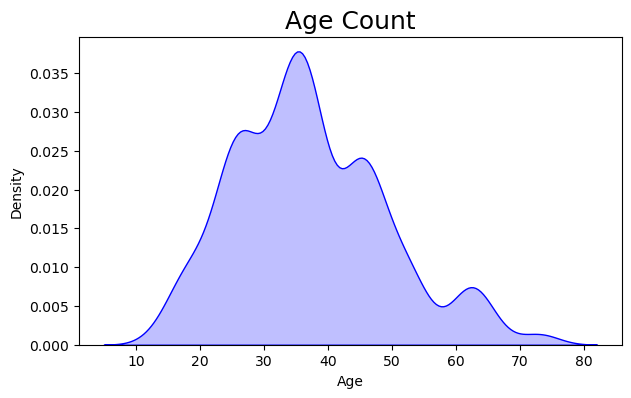

In [9]:
    plt.figure(figsize = (7,4))
    sns.kdeplot(df.Age, shade = True, color = "b")
    plt.title("Age Count", fontsize = 18)
    plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_3240\4017983010.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == 'Male']['Age'], label='Male', shade=True, color='blue')
C:\Users\HP\AppData\Local\Temp\ipykernel_3240\4017983010.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == 'Female']['Age'], label='Female', shade=True, color='pink')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


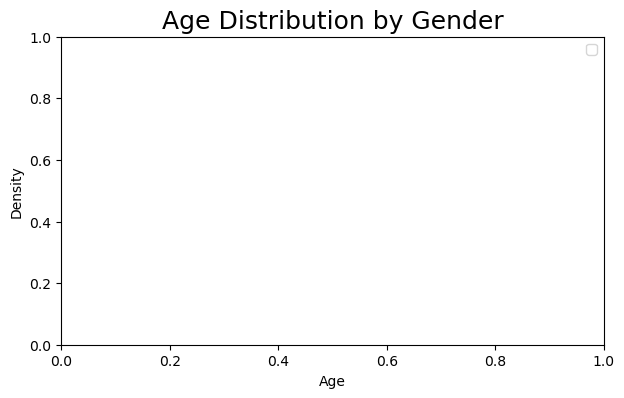

In [10]:
plt.figure(figsize=(7, 4))
sns.kdeplot(df[df['Gender'] == 'Male']['Age'], label='Male', shade=True, color='blue')
sns.kdeplot(df[df['Gender'] == 'Female']['Age'], label='Female', shade=True, color='pink')
plt.title("Age Distribution by Gender", fontsize=18)
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

In [11]:
df1 = df.drop(["Level","Patient Id","index"],axis=1)


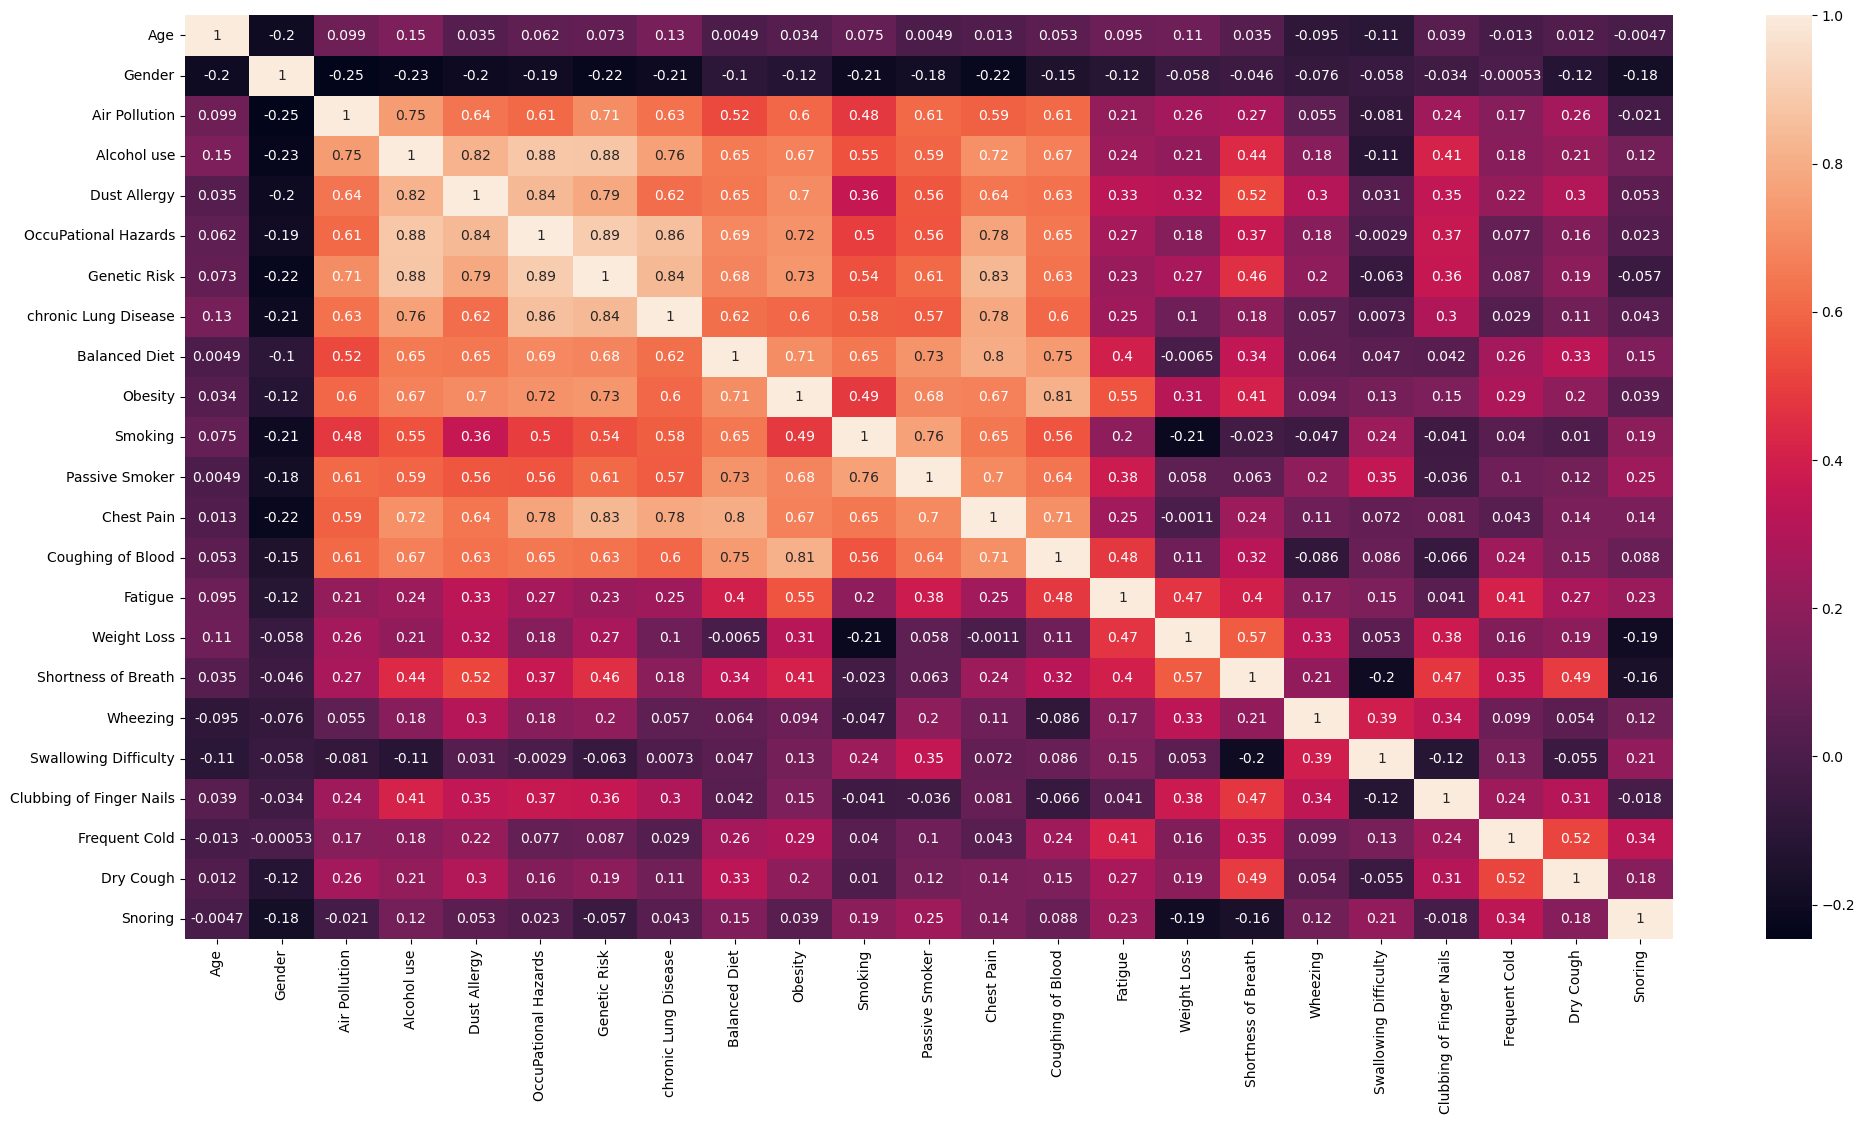

In [12]:
plt.subplots(figsize = (24, 12))
sns.heatmap(df1.corr(), annot = True)
plt.show()


#It also shows us that obesity, air pollution, balanced diet, cough of blood, passive smoker is strong correlated with lung caner, therefore we should be alert when these factors occur to us

In [13]:
correlationC=[]
for column in df1.columns :
    for columnC in df1.columns:
        a = df1[column].corr(df1[columnC])
        if a > 0.8 and (column != columnC) :
            if a in correlationC:
                continue
            else :
                correlationC.append(a)         
                print (column +" column has high correlation with column "+ columnC)
                print(df1[column].corr(df1[columnC]))
                print("*******************************")

Alcohol use column has high correlation with column Dust Allergy
0.8186435195099219
*******************************
Alcohol use column has high correlation with column OccuPational Hazards
0.8787859206801716
*******************************
Alcohol use column has high correlation with column Genetic Risk
0.8772098877053738
*******************************
Dust Allergy column has high correlation with column OccuPational Hazards
0.835859771456722
*******************************
OccuPational Hazards column has high correlation with column Genetic Risk
0.8930485226784646
*******************************
OccuPational Hazards column has high correlation with column chronic Lung Disease
0.8582838533909183
*******************************
Genetic Risk column has high correlation with column Alcohol use
0.8772098877053737
*******************************
Genetic Risk column has high correlation with column OccuPational Hazards
0.8930485226784647
*******************************
Genetic Risk column h

In [14]:
correlationC.sort()
correlationC.reverse()
correlationC

[0.8930485226784647,
 0.8930485226784646,
 0.8787859206801716,
 0.8772098877053738,
 0.8772098877053737,
 0.8582838533909183,
 0.836230827381165,
 0.835859771456722,
 0.8317508263736832,
 0.8186435195099219,
 0.8148047650547859]

In [15]:
df["Gender"] = df["Gender"].replace([1,2],["Female","Male"])
df["Air Pollution"] = df["Air Pollution"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Dust Allergy"] = df["Dust Allergy"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["OccuPational Hazards"] = df["OccuPational Hazards"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Genetic Risk"] = df["Genetic Risk"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["chronic Lung Disease"] = df["chronic Lung Disease"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Fatigue"] = df["Fatigue"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Weight Loss"] = df["Weight Loss"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Shortness of Breath"] = df["Shortness of Breath"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Wheezing"] = df["Wheezing"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Swallowing Difficulty"] = df["Swallowing Difficulty"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["Clubbing of Finger Nails"] = df["Clubbing of Finger Nails"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["Frequent Cold"] = df["Frequent Cold"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Dry Cough"] = df["Dry Cough"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Snoring"] = df["Snoring"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Obesity"] = df["Obesity"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["Passive Smoker"] = df["Passive Smoker"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])

In [16]:
df["Passive Smoker"].value_counts()

Passive Smoker
low                     284
very high               187
medium                  161
below medium average    140
extremely high          108
very low                 60
high                     30
above medium average     30
Name: count, dtype: int64

In [17]:
df.Level.value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

# Relation between OccuPational Hazards and Genetic Risk

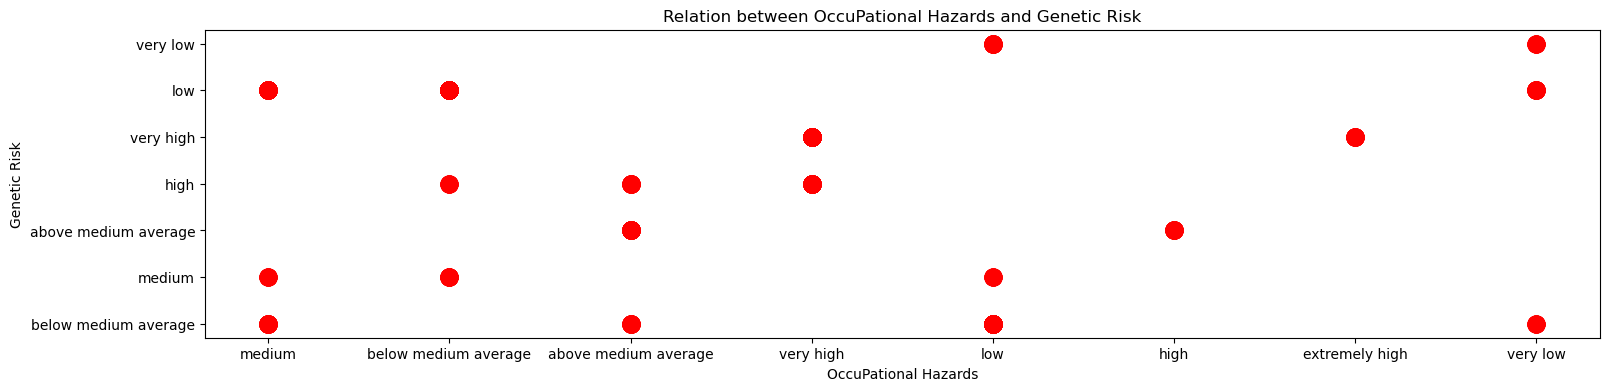

In [18]:
f = plt.figure(figsize=(18, 4))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Relation between OccuPational Hazards and Genetic Risk")
plt.scatter(df["OccuPational Hazards"],df["Genetic Risk"],alpha=0.7,c="red",linewidths=7)
plt.show()

There's a postive correlation between them as people with high genetic risk are having high occupational hazards

# Relation Between OccuPational Hazards and Gender

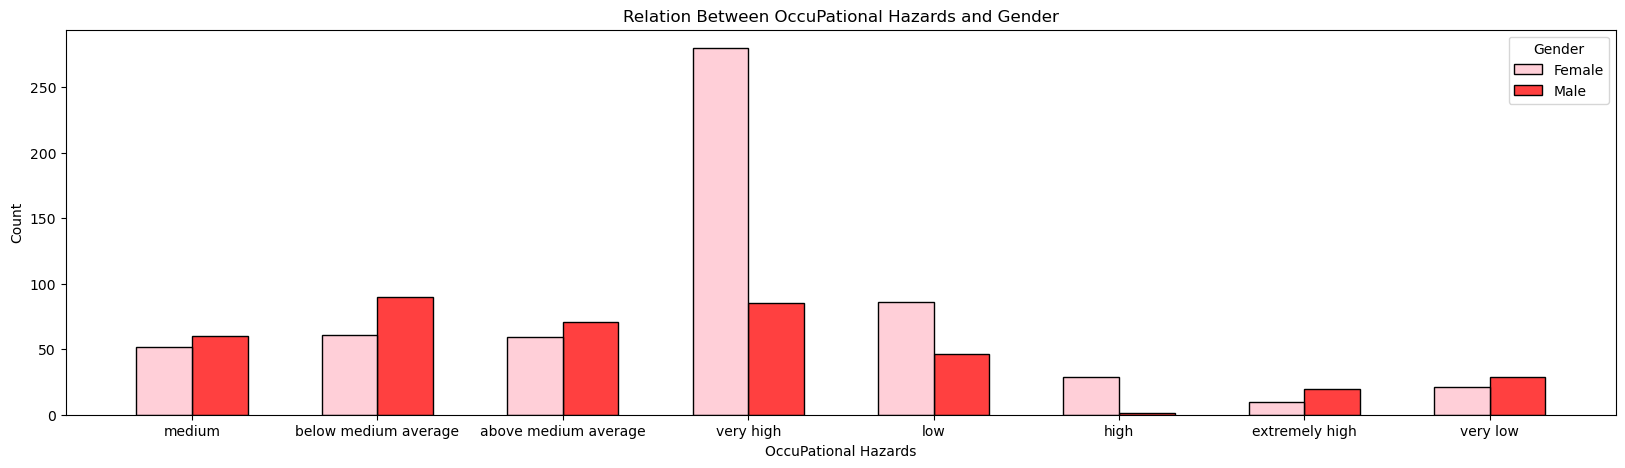

In [19]:
plt.subplots(figsize=(20, 5))
plt.title("Relation Between OccuPational Hazards and Gender")

sns.histplot(data=df, x=df["OccuPational Hazards"], hue=df["Gender"], multiple="dodge", shrink=.6,palette=["pink","red"])

plt.show()

females are more likely to get lungs disease with high ratio compared to men

In [20]:
df.Gender.value_counts()

Gender
Female    598
Male      402
Name: count, dtype: int64

# Passive Smokers

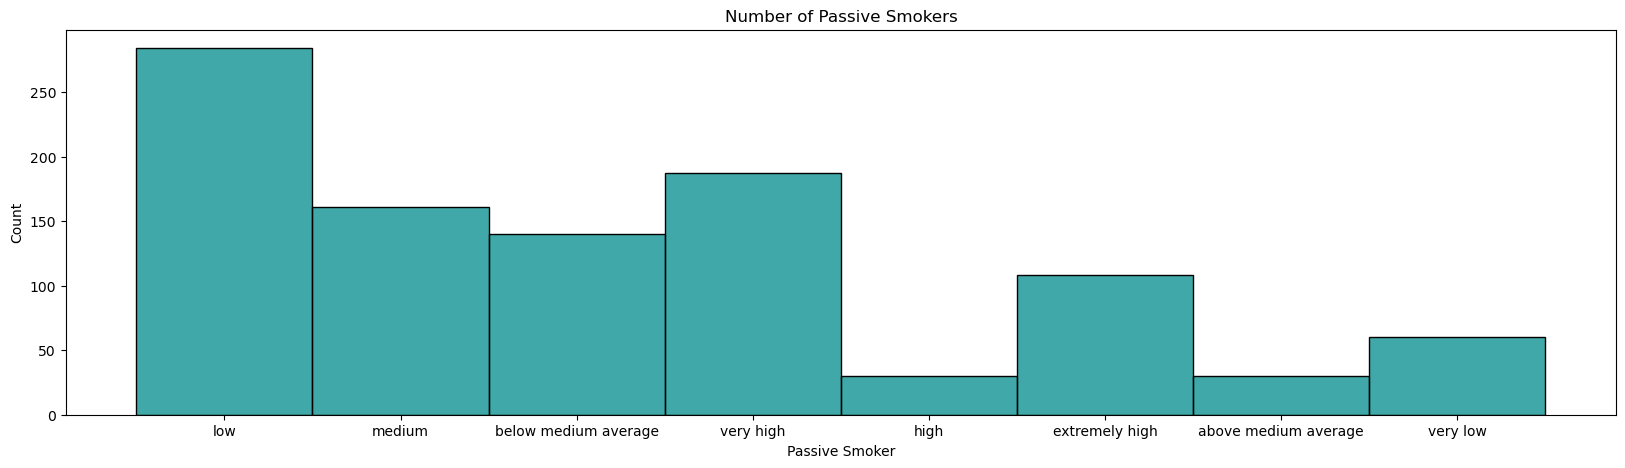

In [21]:
plt.subplots(figsize=(20, 5))
plt.title("Number of Passive Smokers")
sns.histplot(data=df, x=df["Passive Smoker"],color= "darkcyan")
plt.show()

# Passive Smokers Differentiated by Gender

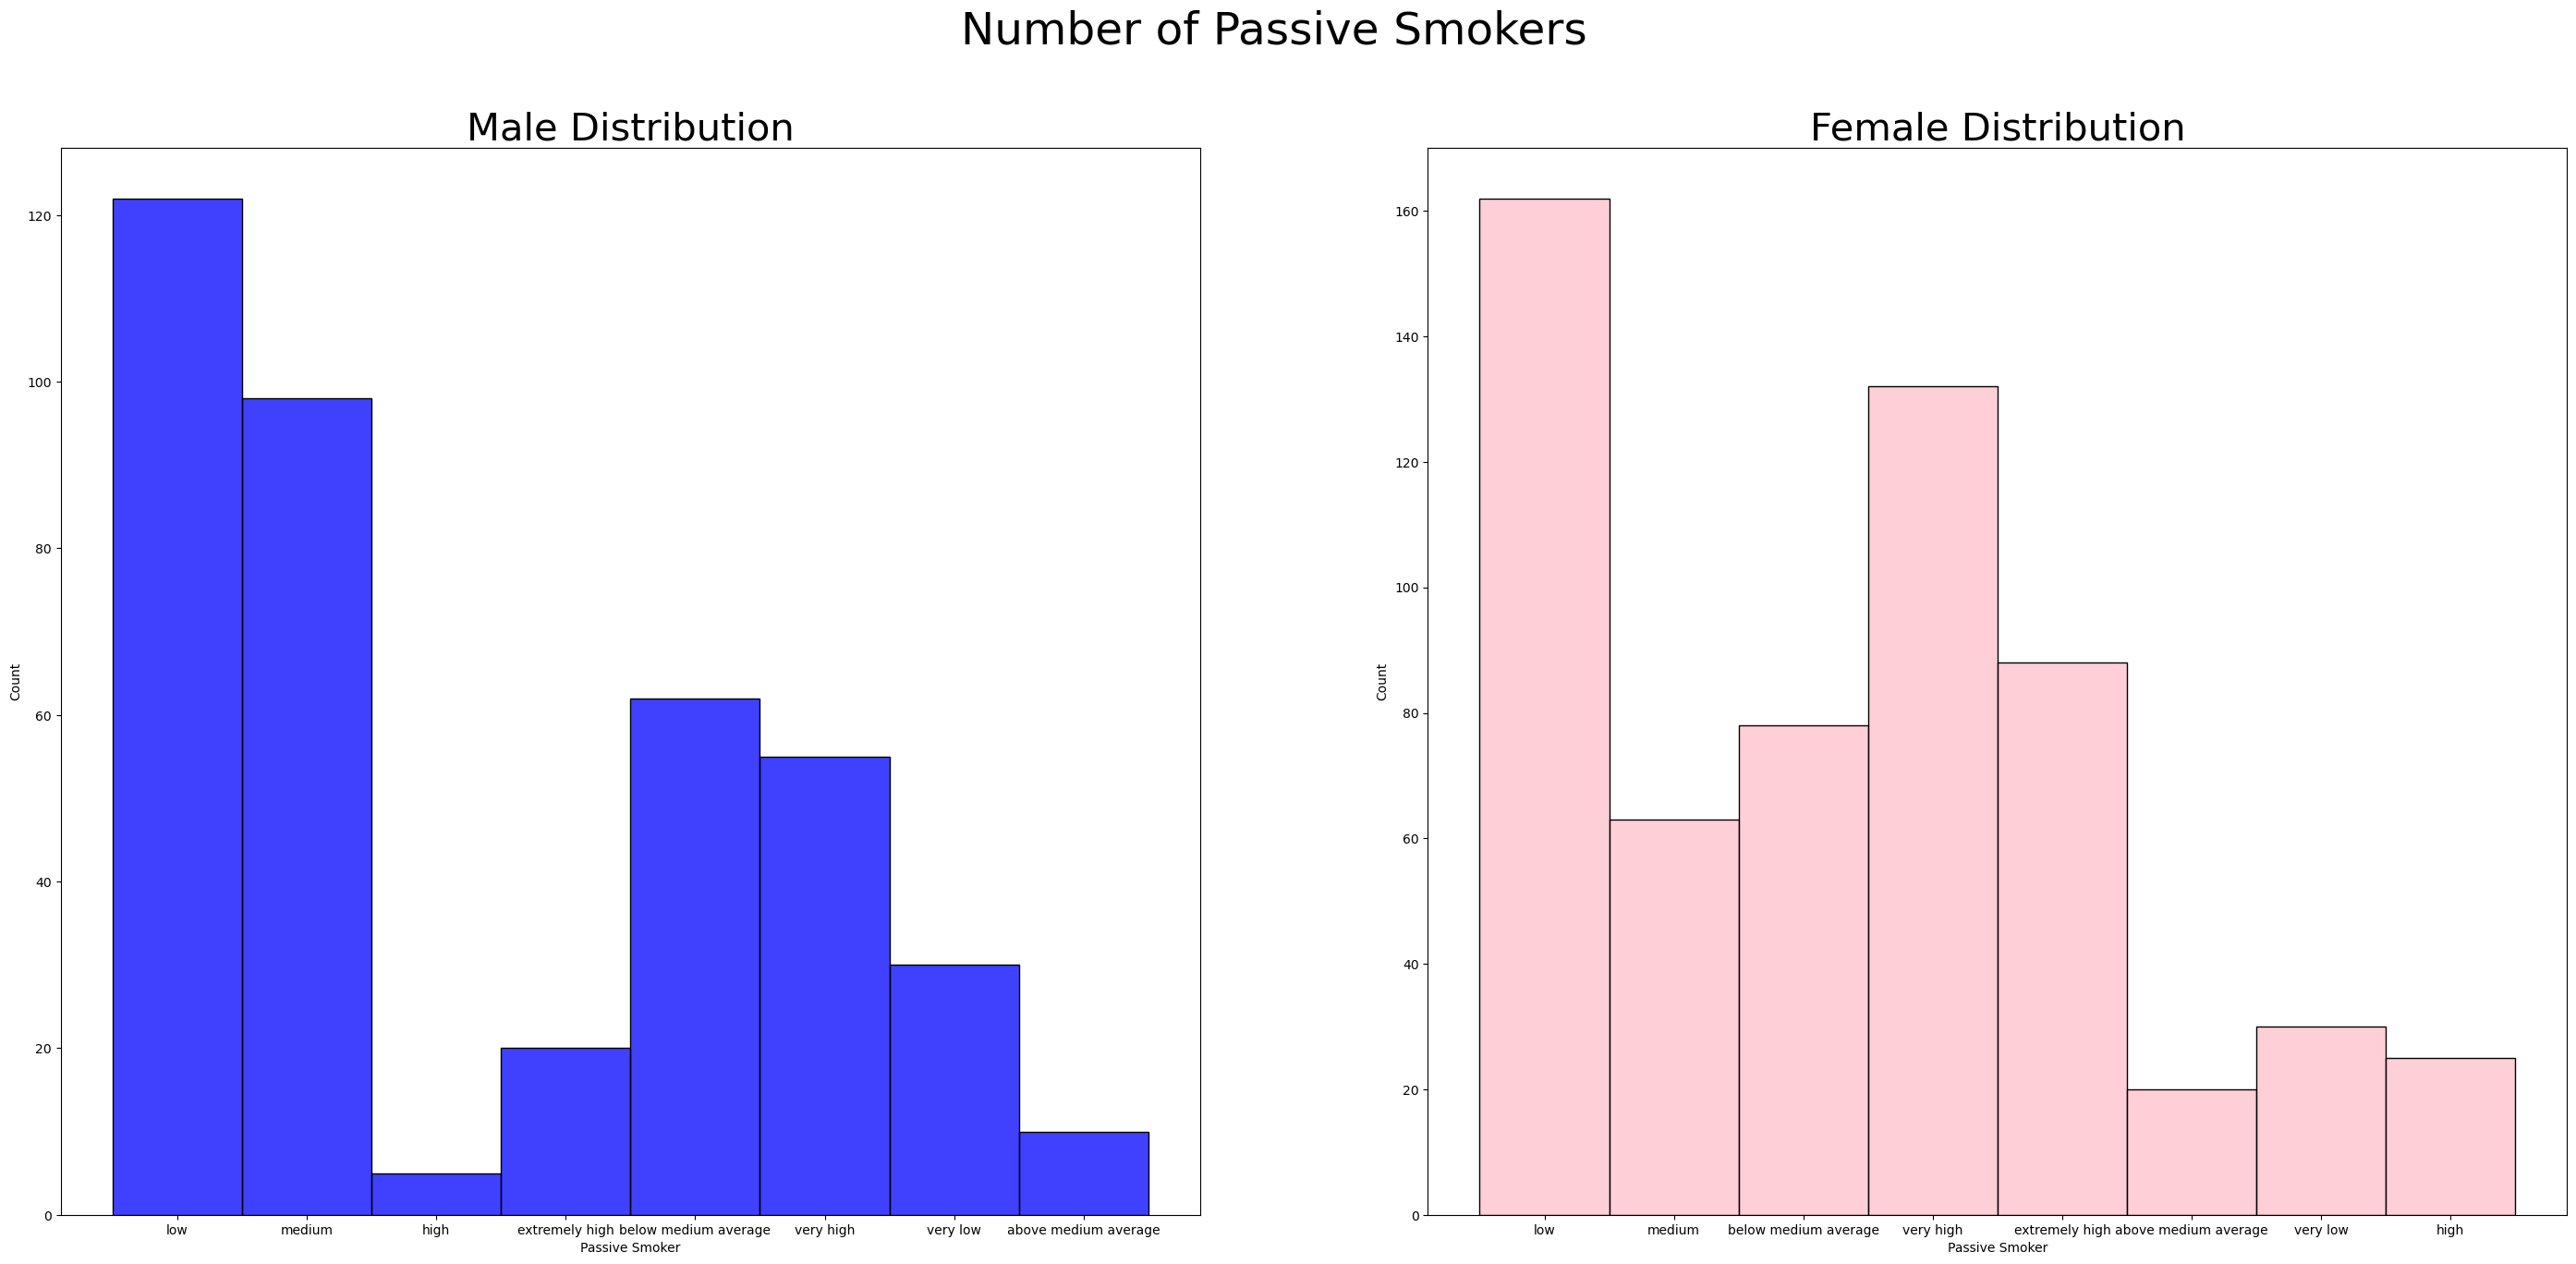

In [22]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(35, 15))
fig.suptitle("Number of Passive Smokers",size=35)

# Plot for Male
sns.histplot(data=df[df['Gender'] == 'Male'], x='Passive Smoker', ax=axes[0], color='blue', bins=10)
axes[0].set_title('Male Distribution',size=30)

# Plot for Female
sns.histplot(data=df[df['Gender'] == 'Female'], x='Passive Smoker', ax=axes[1], color='pink', bins=10)
axes[1].set_title('Female Distribution',size=30)

plt.show()

# Most Passive Smokers are Smoking in low values nearly 300 Smoker

In [23]:
# # Assuming 'Passive Smoker' is the column representing the number of passive smokers
# # Convert 'Passive Smoker' column to numeric, handling errors with 'coerce' to replace non-numeric values with NaN
# df['Passive Smoker'] = pd.to_numeric(df['Passive Smoker'], errors='coerce')

# # Set a threshold for the number of passive smokers
# threshold = 300

# # Filter the DataFrame directly without dropping NaN values
# filtered_df = df[df['Passive Smoker'] < threshold]

# # Plot the histogram
# plt.figure(figsize=(12, 6))
# sns.histplot(data=filtered_df, x='Passive Smoker', hue="Gender", bins=30, kde=True, color='skyblue')
# plt.title(f'Distribution of Passive Smokers with Values < {threshold}')
# plt.xlabel('Number of Passive Smokers')
# plt.ylabel('Frequency')
# plt.show()

# Adults are the most people to drink alcohols ( 18 < Adults < 45 )

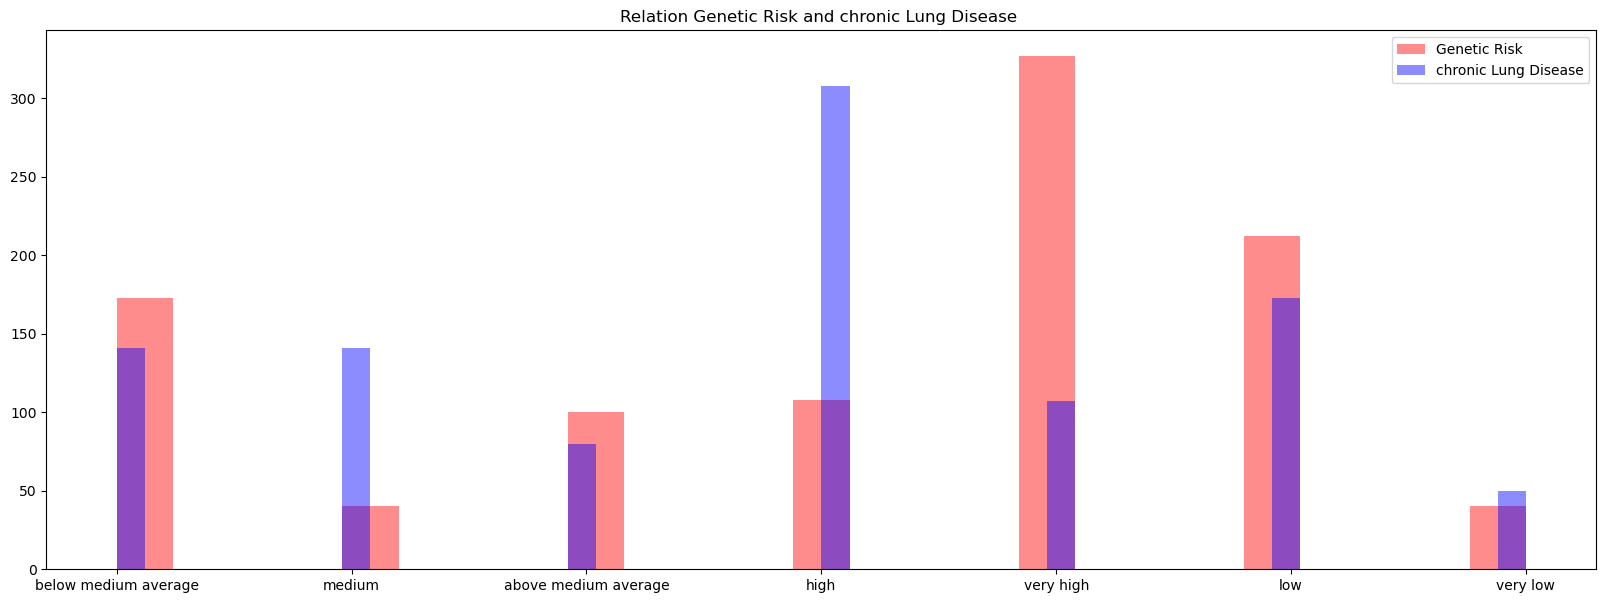

In [24]:
plt.subplots(figsize=(20, 7))

plt.hist(df['Genetic Risk'], bins=25, alpha=0.45, color='red')
plt.hist(df['chronic Lung Disease'], bins=50, alpha=0.45, color='blue')

plt.title("Relation Genetic Risk and chronic Lung Disease ")

plt.legend(['Genetic Risk', 
            'chronic Lung Disease'])
plt.show()

# Graph shows Genetic Risk has no effect on chronic Lung Disease

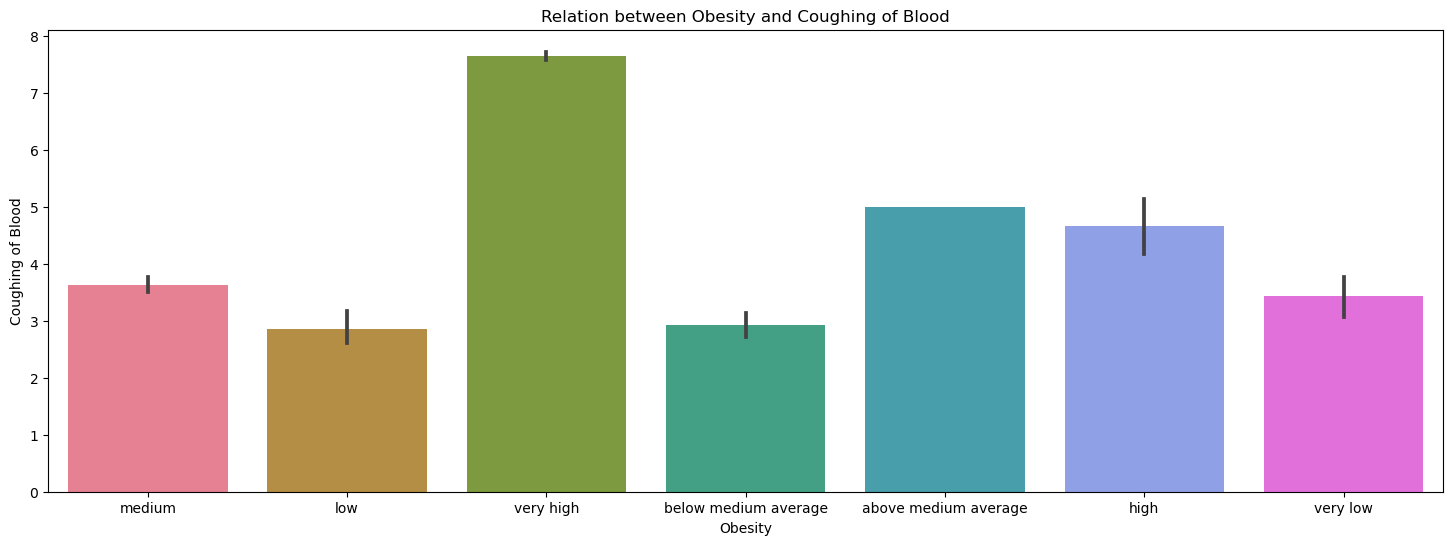

In [25]:
plt.figure(figsize=(18, 6))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df, x="Obesity", y="Coughing of Blood",palette="husl")
plt.show()



#  People with high obesity tend to have more coughing of blood

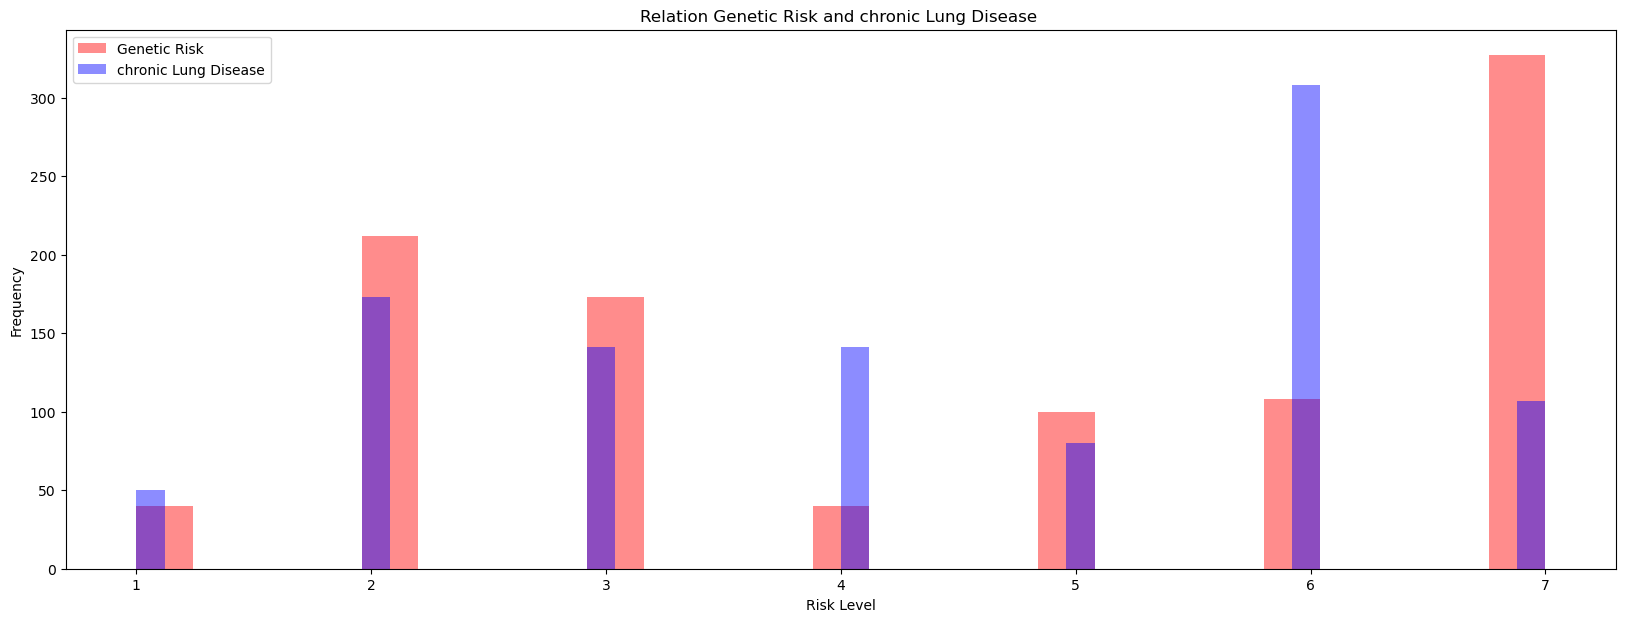

In [26]:
df6 = pd.read_csv(r"C:\Users\HP\Pictures\Jupyter\ML Project\archive\cancer patient data sets.csv", sep=",",encoding="UTF-8")

plt.subplots(figsize=(20, 7))

plt.hist(df6['Genetic Risk'], bins=25, alpha=0.45, color='red')
plt.hist(df6['chronic Lung Disease'], bins=50, alpha=0.45, color='blue')

plt.title("Relation Genetic Risk and chronic Lung Disease ")
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
  
plt.legend(['Genetic Risk', 
            'chronic Lung Disease'])
le = LabelEncoder()

# transforming the datatype
df6['Level'] = le.fit_transform(df6['Level'])
df6['Patient Id'] = le.fit_transform(df6['Patient Id'])


# Differentiated By Gender

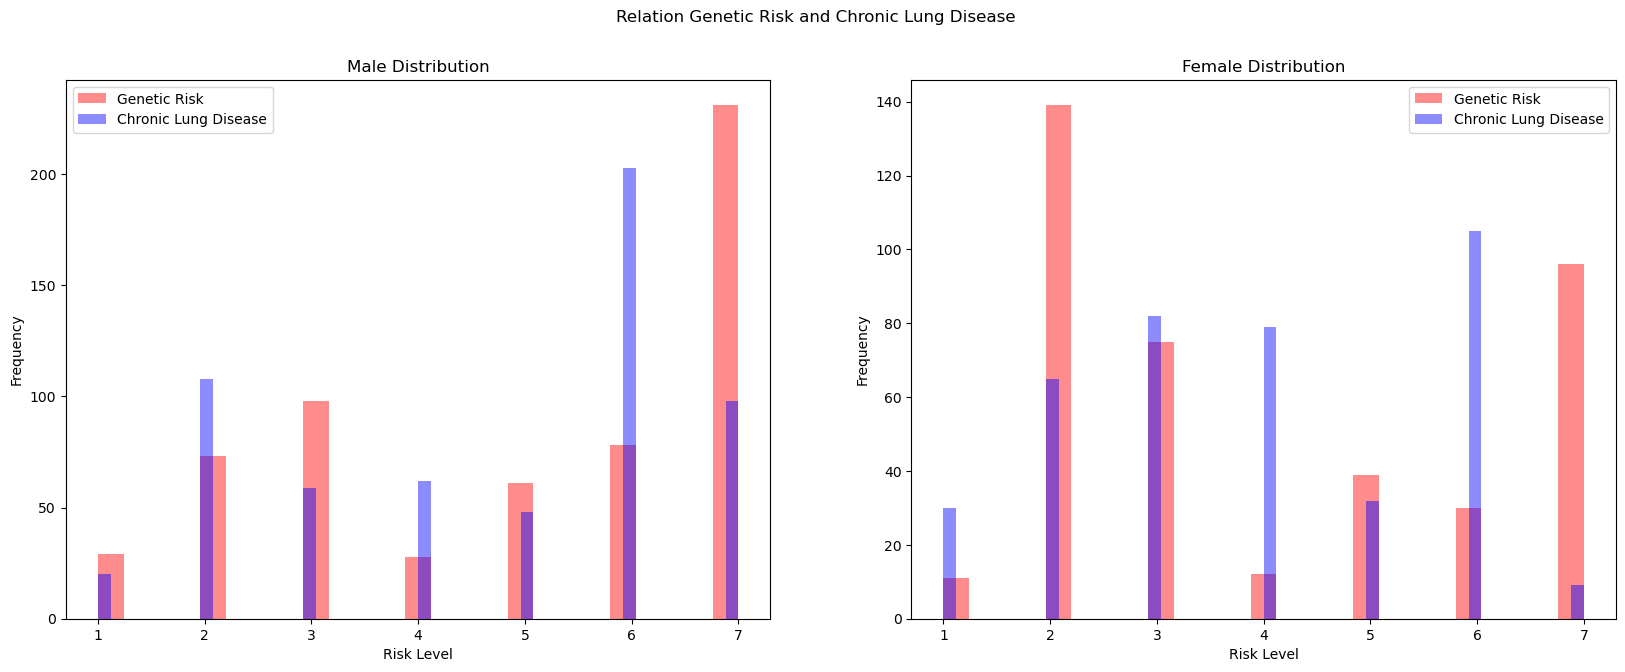

In [27]:
df6 = pd.read_csv(r"C:\Users\HP\Pictures\Jupyter\ML Project\archive\cancer patient data sets.csv", sep=",", encoding="UTF-8")

# Encode 'Gender' using LabelEncoder
le = LabelEncoder()
df6['Gender'] = le.fit_transform(df6['Gender'])

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle("Relation Genetic Risk and Chronic Lung Disease")

# Plot for Male
axes[0].hist(df6[df6['Gender'] == 0]['Genetic Risk'], bins=25, alpha=0.45, color='red', label='Genetic Risk')
axes[0].hist(df6[df6['Gender'] == 0]['chronic Lung Disease'], bins=50, alpha=0.45, color='blue', label='Chronic Lung Disease')
axes[0].set_title('Male Distribution')
axes[0].set_xlabel('Risk Level')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot for Female
axes[1].hist(df6[df6['Gender'] == 1]['Genetic Risk'], bins=25, alpha=0.45, color='red', label='Genetic Risk')
axes[1].hist(df6[df6['Gender'] == 1]['chronic Lung Disease'], bins=50, alpha=0.45, color='blue', label='Chronic Lung Disease')
axes[1].set_title('Female Distribution')
axes[1].set_xlabel('Risk Level')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.show()

In [28]:
le = LabelEncoder()

# transforming the datatype
df6['Level'] = le.fit_transform(df6['Level'])
df6['Patient Id'] = le.fit_transform(df6['Patient Id'])

In [29]:
# Split data between predictors and output variable
x = df6.drop(["Level","Patient Id","index"],axis=1).values
y = df.Level.values
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train

array([[28,  1,  1, ...,  7,  7,  5],
       [53,  0,  6, ...,  1,  7,  6],
       [28,  1,  1, ...,  7,  7,  5],
       ...,
       [36,  1,  2, ...,  3,  2,  3],
       [49,  0,  6, ...,  6,  7,  2],
       [49,  0,  6, ...,  6,  7,  2]], dtype=int64)

In [31]:
x_test

array([[48,  1,  1, ...,  1,  2,  1],
       [62,  0,  6, ...,  3,  4,  2],
       [22,  0,  6, ...,  3,  4,  2],
       ...,
       [28,  0,  6, ...,  4,  5,  3],
       [44,  0,  2, ...,  3,  2,  3],
       [46,  1,  1, ...,  7,  7,  5]], dtype=int64)

In [32]:
# Scale train/ test predictors based on training data
s_scaler = StandardScaler().fit(x_train)
x_train_scaled = s_scaler.transform(x_train)
x_test_scaled = s_scaler.transform(x_test)

In [33]:
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    
    plt.figure(figsize=(10,8))
    
    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=labels.values(),
                yticklabels=labels.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

In [34]:
knn=KNeighborsClassifier(n_neighbors=5)

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
knn.score(x_train,y_train)

0.99875

In [37]:
knn.score(x_test,y_test)

0.995

In [38]:
y_pred=knn.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Medium,Medium
5,Medium,Medium
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,Medium,Medium


In [39]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_scaled, y_train)
y_pred_knn = knn2.predict(x_test_scaled)

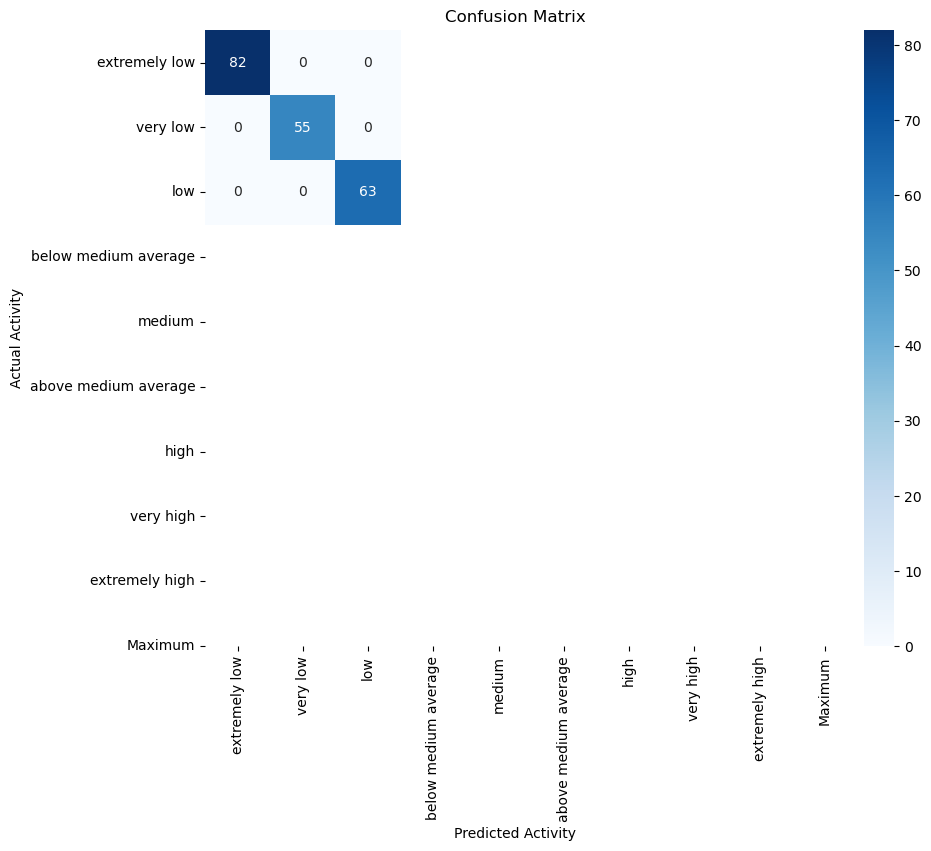

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [40]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_scaled, y_train)
y_pred_knn = knn2.predict(x_test_scaled)
resultsSummarizer(y_test, y_pred_knn)


# Logistic Regression

In [41]:
lr = LogisticRegression()
lr.fit(x_train , y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
lr.score(x_train , y_train)

0.99375

In [43]:
lr.score(x_test , y_test)

1.0

In [44]:
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Medium,Medium
5,Medium,Medium
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,Medium,Medium


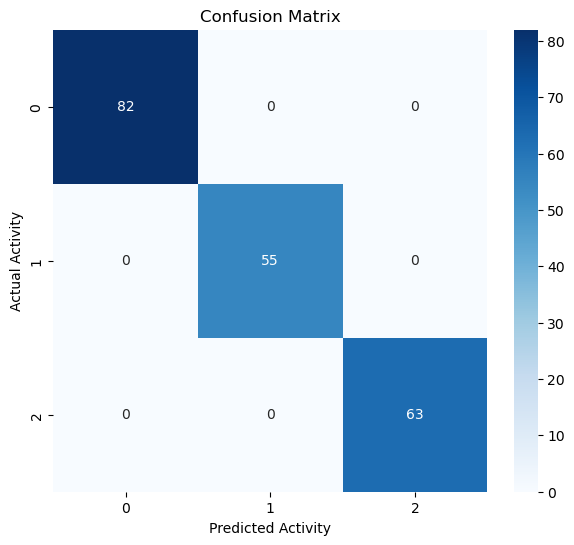

In [45]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

